In [ ]:
"""
Author: Alex Martin
Purpose: To approximate the ground state of a simple system consisting of two spin-1/2 particles using the VQE framework.
Date: Jan. 13, 2026

This code is utilized in "Studying the Hyperfine Interaction Using the Variational Quantum Eigensolver" by J. W. Martin and A. Martin.
"""

In [1]:
!pip install qiskit
!pip install py-bobyqa
!pip install numpy
!pip install matplotlib
!pip install qiskit-ibm-runtime

!pip install pylatexenc
!apt-get update
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended # Run this to use latex in your colab environment.
!pip install scienceplots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.4/378.4 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=db859b07f733ee469519aaf26310864f6a3f9ca9f7d71faac3bc809276c2b1ec
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178b

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import QiskitRuntimeService
from typing import List, Tuple, Callable
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService(token="<your token here>",
                               channel="ibm_quantum_platform",
                               instance="<your instance CRN here>")

QPUs = service.backends()
print(QPUs) # Prints a list of QPUs to choose from.

qiskit_runtime_service._discover_account:WARNING:2026-01-13 19:21:22,659: Loading account with the given token. A saved account will not be used.


[<IBMBackend('ibm_fez')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibm_marrakesh')>]


In [3]:
import datetime
from datetime import timezone

# Print the current date and time
print(f"Calibration data accessed on: {datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=-6)))}\n")

# Retrieve qubit properties
backend_name = 'ibm_fez'
backend = next(qpu for qpu in QPUs if qpu.name == backend_name)
for qubit_index in range(156):
    qubit_props = backend.properties().qubit_property(qubit_index)

    # Access specific properties
    t1 = qubit_props.get("T1", (None,))[0]
    t2 = qubit_props.get("T2", (None,))[0]
    frequency = qubit_props.get("frequency", (None,))[0]
    anharmonicity = qubit_props.get("anharmonicity", (None,))[0]
    readout_error = qubit_props.get("readout_error", (None,))[0]
    prob_meas0_prep1 = qubit_props.get("prob_meas0_prep1", (None,))[0]
    prob_meas1_prep0 = qubit_props.get("prob_meas1_prep0", (None,))[0]
    readout_length = qubit_props.get("readout_length", (None,))[0]

    print(f"Qubit {qubit_index} Properties:")
    print(f"  T1: {t1} seconds")
    print(f"  T2: {t2} seconds")
    print(f"  Frequency: {frequency} Hz")
    print(f"  Anharmonicity: {anharmonicity} Hz")
    print(f"  Readout Error: {readout_error}")
    print(f"  P(0 | 1): {prob_meas0_prep1}")
    print(f"  P(1 | 0): {prob_meas1_prep0}")
    print(f"  Readout Length: {readout_length} seconds")
    print("-" * 40)

Calibration data accessed on: 2026-01-13 13:21:31.214774-06:00

Qubit 0 Properties:
  T1: 5.4111131557154396e-05 seconds
  T2: 4.56861768047432e-05 seconds
  Frequency: None Hz
  Anharmonicity: None Hz
  Readout Error: 0.0133056640625
  P(0 | 1): 0.02392578125
  P(1 | 0): 0.002685546875
  Readout Length: 1.56e-06 seconds
----------------------------------------
Qubit 1 Properties:
  T1: 0.00022958951987041312 seconds
  T2: 0.00025352288126632993 seconds
  Frequency: None Hz
  Anharmonicity: None Hz
  Readout Error: 0.0172119140625
  P(0 | 1): 0.0234375
  P(1 | 0): 0.010986328125
  Readout Length: 1.56e-06 seconds
----------------------------------------
Qubit 2 Properties:
  T1: 0.0001523023196595444 seconds
  T2: 0.00011457431798937615 seconds
  Frequency: None Hz
  Anharmonicity: None Hz
  Readout Error: 0.00732421875
  P(0 | 1): 0.0068359375
  P(1 | 0): 0.0078125
  Readout Length: 1.56e-06 seconds
----------------------------------------
Qubit 3 Properties:
  T1: 0.00024123355547420

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from collections import Counter
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Pauli
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator, Batch
from qiskit import transpile
from qiskit.circuit import Parameter
import pybobyqa

history = []

shots = 2048 #1024 is default

hamiltonian = SparsePauliOp.from_list([("XX", 1.0), ("YY", 1.0), ("ZZ", 1.0)])

backend = service.backend("ibm_fez")
estimator = Estimator(backend)
estimator.options.default_shots = shots
estimator.options.resilience_level = 1 # level 1 focuses on low-cost mitigation, primarily readout error mitigation (e.g., Twirled Readout Error eXtinction).

theta = Parameter("theta")  # Define theta as a Parameter

# Create the quantum circuit with parameter theta. This is the ansatz state without the transformations before measurement, as Qiskit will automatically perform the transformations based on H.
#######
ansatz = QuantumCircuit(2)
ansatz.h(0)
ansatz.cx(0, 1)
ansatz.x(0)
ansatz.p(theta, 1)
#######

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_ansatz = pm.run(ansatz)

if isa_ansatz.layout is not None:
    isa_ham = hamiltonian.apply_layout(isa_ansatz.layout) # Applies the ISA circuit layout to the Hamiltonian.
else:
    isa_ham = hamiltonian


def objective_function(theta):
    """Objective function for computing the expectation value of H = XX + YY + ZZ."""

    job = estimator.run([(isa_ansatz, isa_ham, [theta])]) # Creates a job using the primitive unified blocs (PUBs) from above.

    expval = job.result()[0] # Stores the first indexed result from running the job
    history.append(expval) # Appends the expectation value to the history list
    iteration = len(history)
    print(f"Iteration: {iteration}, Exp. Val = {expval.data.evs}, Theta = {theta}")
    return expval.data.evs[0]


rng = np.random.default_rng(seed=1) # Random number generator. seed=1 ensures initial theta = 0.51182...
initial_theta = rng.random()  # Generates a float
print(f"\nInitial Theta = {initial_theta},")

lower_bound = np.array([0.0])
upper_bound = np.array([2*np.pi])

# Perform the optimization:
minimum = pybobyqa.solve(
    objective_function,
    [initial_theta], # initial guess, needs to be an array for py-bobyqa
    bounds = (lower_bound, upper_bound), # To stop py-bobyqa from overshooting, limit the parameter range to [0, 2*pi]. The ground state occurs
    objfun_has_noise=True,
    maxfun = 20 # Set this according to the problem
)

print(minimum)


Initial Theta = 0.5118216247002567,
Iteration: 1, Exp. Val = [0.79009416], Theta = [0.51182162]
Iteration: 2, Exp. Val = [0.62742781], Theta = [0.61182162]
Iteration: 3, Exp. Val = [0.84334338], Theta = [0.41182162]
Iteration: 4, Exp. Val = [0.60364011], Theta = [0.71182162]
Iteration: 5, Exp. Val = [0.6098283], Theta = [0.67895003]
Iteration: 6, Exp. Val = [0.50876285], Theta = [0.77415112]
Iteration: 7, Exp. Val = [0.02936642], Theta = [1.02346912]
Iteration: 8, Exp. Val = [-0.42312277], Theta = [1.27278712]
Iteration: 9, Exp. Val = [-0.96206998], Theta = [1.52210512]
Iteration: 10, Exp. Val = [-2.64683796], Theta = [2.51937712]
Iteration: 11, Exp. Val = [-2.8555408], Theta = [3.51664912]
Iteration: 12, Exp. Val = [-3.05623326], Theta = [3.15901876]
Iteration: 13, Exp. Val = [-3.03586716], Theta = [3.03376485]
Iteration: 14, Exp. Val = [-3.03322014], Theta = [3.28427267]
Iteration: 15, Exp. Val = [-3.05434223], Theta = [3.17154415]
Iteration: 16, Exp. Val = [-3.01343173], Theta = [3

KeyboardInterrupt: 

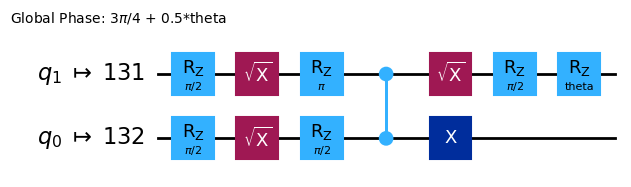

In [ ]:
isa_ansatz.draw(output="mpl")

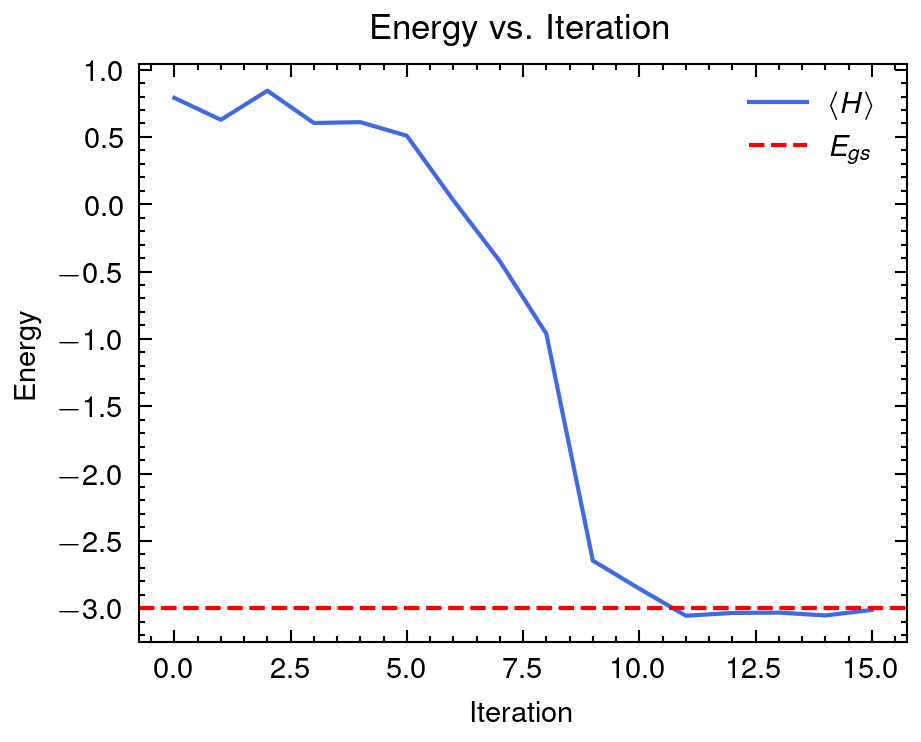

In [8]:
import matplotlib.pyplot as plt
import scienceplots
import os

plt.style.use(['science', 'nature'])
plt.rcParams['figure.dpi'] = 300

# Extract expectation values from PubResult objects history
values = [res.data.evs[0] for res in history]

plt.plot(range(len(values)), values, color='royalblue', label=r'${\langle H\rangle}$')

plt.xlabel('Iteration')
plt.ylabel(r"Energy")
plt.title('Energy vs. Iteration')
plt.axhline(y=-3.0, color='r', linestyle='--', label=r"${E}_{{gs}}$")

plt.legend()

if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig(f'plots/final_energy.pdf', format='pdf')
plt.show()

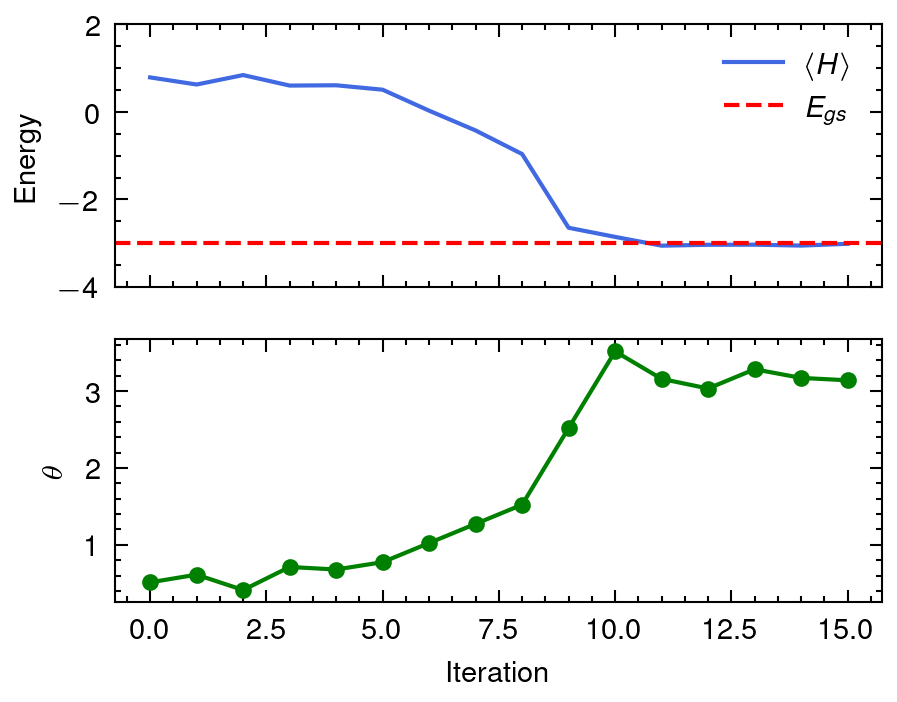

In [60]:
from matplotlib.figure import figaspect
import matplotlib.pyplot as plt
import scienceplots
import os
import numpy as np

fig, axs = plt.subplots(2, 1, sharex=True)

plt.style.use(['science', 'nature'])
plt.rcParams['figure.dpi'] = 300

# Extract expectation values from PubResult objects history
values = [res.data.evs[0] for res in history]
thetas = np.array([0.51182162, 0.61182162, 0.41182162, 0.71182162, 0.67895003, 0.77415112, 1.02346912, 1.27278712, 1.52210512, 2.51937712, 3.51664912, 3.15901876, 3.03376485, 3.28427267, 3.17154415, 3.14078226]) # from the above cell

axs[0].plot(range(len(values)), values, color='royalblue', label=r'${\langle H\rangle}$')
axs[1].plot(range(len(values)), thetas, marker='o', color='green', label='$\\theta$')

# Use set_xlabel and set_ylabel for axs objects
axs[0].set_ylabel(r"Energy")
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel("$\\theta$")

axs[0].axhline(y=-3.0, color='r', linestyle='--', label=r"${E}_{{gs}}$")

# Render legends for subplots
axs[0].legend()
#axs[1].legend()

axs[0].set_ylim(-4, 2)

if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig(f'plots/final_energy.pdf', format='pdf')
plt.show()

In [25]:
minimum_energy = min(values)
print(minimum_energy)

-3.056233263909551


In [24]:
experimental_gs = minimum_energy
theoretical_gs = -3.00

# Compute absolute error
absolute_error = abs(experimental_gs - theoretical_gs)

# Compute relative errror
relative_error = absolute_error / theoretical_gs

# Compute percent error
percent_error = relative_error * 100

# Print results
print(f"Experimental Value: {experimental_gs}")
print(f"Theoretical Value:  {theoretical_gs}")
print("-" * 40)
print(f"Absolute Error:     {absolute_error}")
print(f"Relative Error:     {relative_error}")
print(f"Percentage Error:   {percent_error}%")

Experimental Value: -3.056233263909551
Theoretical Value:  -3.0
----------------------------------------
Absolute Error:     0.05623326390955086
Relative Error:     -0.018744421303183618
Percentage Error:   -1.8744421303183618%
